In [57]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv("Salary_Data.csv")
X = df["YearsExperience"].values
y = df["Salary"].values

In [59]:
X

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [60]:
y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872])

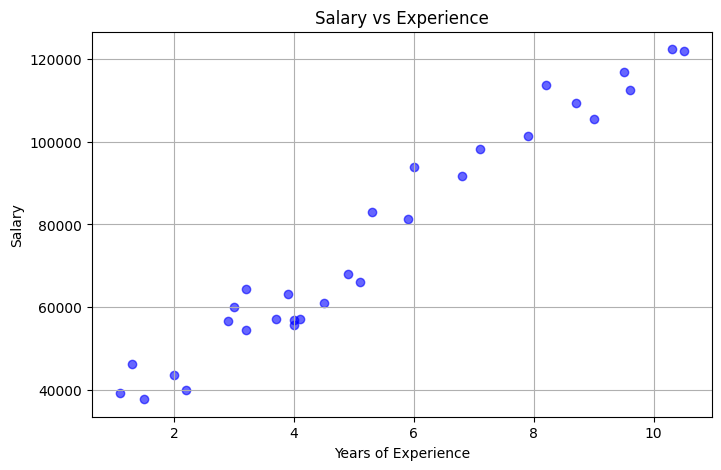

In [61]:
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color="blue", alpha=0.6)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary vs Experience")
plt.grid(True)
plt.show()

In [62]:
X = np.array(X)
y = np.array(y)

In [63]:
def mean(X):
    return np.sum(X)/len(X)

In [64]:
def variance(X):
    mean_value = mean(X)
    return np.sum((X-mean_value)**2)/len(X)

In [65]:
def norm(X):
    mean_value = mean(X)
    variance_value = variance(X)
    return (X-mean_value)/np.sqrt(variance_value)

In [66]:
X_norm = norm(X)
X_norm

array([-1.51005294, -1.43837321, -1.36669348, -1.18749416, -1.11581443,
       -0.86493538, -0.82909552, -0.75741579, -0.75741579, -0.57821647,
       -0.50653674, -0.47069688, -0.47069688, -0.43485702, -0.29149756,
       -0.1481381 , -0.07645838, -0.00477865,  0.21026054,  0.2461004 ,
        0.53281931,  0.6403389 ,  0.92705781,  1.03457741,  1.21377673,
        1.32129632,  1.50049564,  1.5363355 ,  1.78721455,  1.85889428])

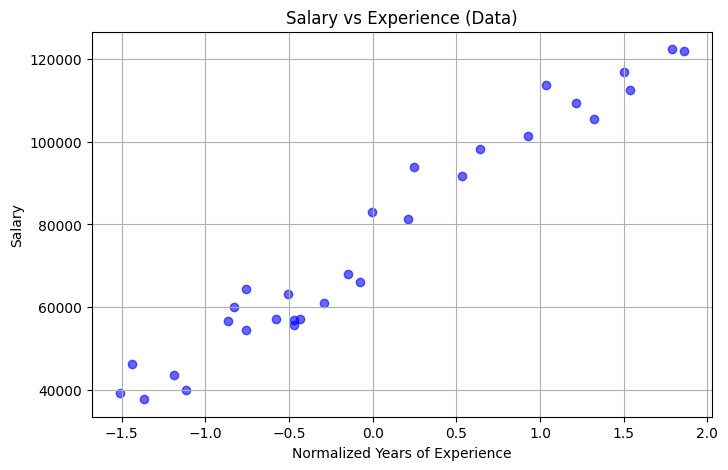

In [67]:
plt.figure(figsize=(8,5))
plt.scatter(X_norm, y, color="blue", alpha=0.6)
plt.xlabel("Normalized Years of Experience")
plt.ylabel("Salary")
plt.title("Salary vs Experience (Data)")
plt.grid(True)
plt.show()

In [68]:
class SimpleLR:
    def __init__(self, lr=0.1, max_iter=2000, threshold=1e-6):
        self.lr = lr
        self.max_iter = max_iter
        self.threshold = threshold
        self.weight = random.uniform(-1,1)
        self.bias = random.uniform(-1,1)
        
    def predict(self,X):
        return self.weight*X + self.bias
        
    def fit(self, X, y):
        n = len(X)
        loss_history = []
        y_pred = self.predict(X)
        errors = y - y_pred
        prev_loss = (1/(2*n))*np.sum(errors**2)
        loss_history.append(prev_loss)
        for i in range(self.max_iter):
            w_grad = (1/n)*np.sum(errors*X)
            b_grad = (1/n)*np.sum(errors)
            self.weight = self.weight + self.lr*w_grad
            self.bias = self.bias + self.lr*b_grad
            y_pred = self.predict(X)
            errors = y - y_pred
            curr_loss = (1/(2*n))*np.sum(errors**2)
            if np.abs(curr_loss-prev_loss) < self.threshold:
                break
            prev_loss = curr_loss
            loss_history.append(curr_loss)
        return loss_history
        
    def plot(self, X,y):
        y_pred = self.predict(X)

        plt.scatter(X, y, label="Actual Data")
        plt.plot(X, y_pred, color="orange", label="Regression Line")
        plt.xlabel("Normalized Years of Experience")
        plt.ylabel("Salary")
        plt.title("Linear Regression from Scratch")
        plt.legend()
        plt.show()

In [69]:
model = SimpleLR()

In [70]:
loss_history = model.fit(X_norm, y)
loss_history

[np.float64(3251525194.203092),
 np.float64(2636706147.7181206),
 np.float64(2138702720.065295),
 np.float64(1735319943.6665053),
 np.float64(1408579894.7834861),
 np.float64(1143920455.1882405),
 np.float64(929546309.1160913),
 np.float64(755903250.7976507),
 np.float64(615252373.5597135),
 np.float64(501325162.9969847),
 np.float64(409044122.44117427),
 np.float64(334296479.5909679),
 np.float64(273750888.8823007),
 np.float64(224708960.40828022),
 np.float64(184984998.34432366),
 np.float64(152808589.07251886),
 np.float64(126745697.56235692),
 np.float64(105634755.43912584),
 np.float64(88534892.3193086),
 np.float64(74684003.19225663),
 np.float64(63464782.9993445),
 np.float64(54377214.64308574),
 np.float64(47016284.27451612),
 np.float64(41053930.675974704),
 np.float64(36224424.2611562),
 np.float64(32312524.065153204),
 np.float64(29143884.906390812),
 np.float64(26577287.187793218),
 np.float64(24498343.035729222),
 np.float64(22814398.27255737),
 np.float64(21450403.0143881

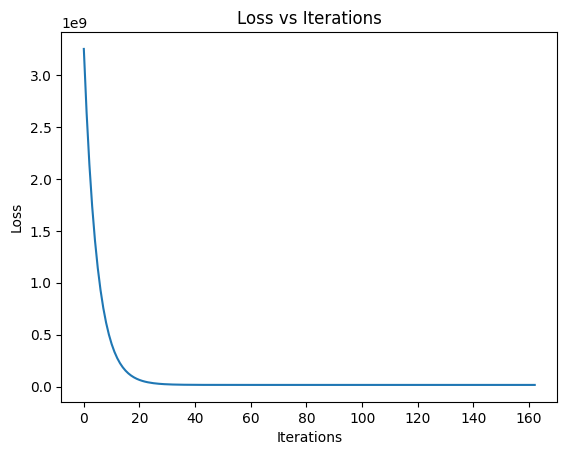

In [71]:
plt.plot(loss_history)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss vs Iterations")
plt.show()

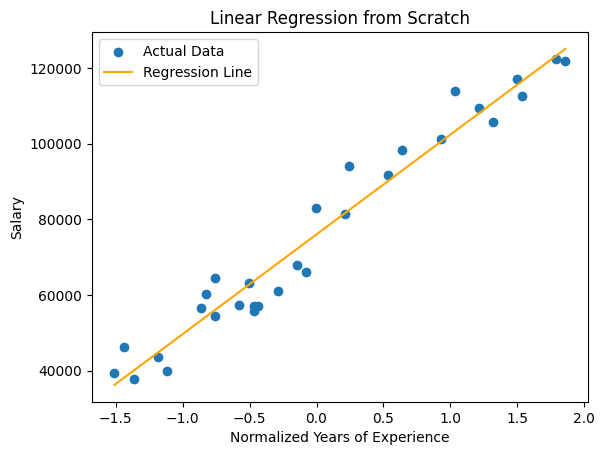

In [72]:
model.plot(X_norm, y)